In [1]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import src.utils as utils

from src.Data import Data
from src.Camera import Camera
from src.Plot import Plot
from src.VisualOdometry import VisualOdometry

import matplotlib.pyplot as plt

In [2]:
data = Data()
camera = Camera('data/camera.dat')

In [3]:
vo = VisualOdometry(camera, data)
vo.initialize()

In [4]:
# map = vo.get_map()
# world_points = data.get_world()

# estimated_map = []
# ground_truth_map = []

# for i in range(len(world_points)):
#     position = world_points[i]['landmark_position']
#     appearances = world_points[i]['landmark_appearance']

#     for j in range(len(map['points'])):
#         pos = map['points'][j]
#         app = map['appearances'][j]

#         if np.array_equal(appearances, app):
#             estimated_map.append(list(pos))
#             ground_truth_map.append(list(position))

# estimated_x_coords = [point[0] for point in estimated_map]
# estimated_y_coords = [point[1] for point in estimated_map]
# estimated_z_coords = [point[2] for point in estimated_map]

# ground_truth_x_coords = [point[0] for point in ground_truth_map]
# ground_truth_y_coords = [point[1] for point in ground_truth_map]
# ground_truth_z_coords = [point[2] for point in ground_truth_map]

# fig = go.Figure()
# fig.add_trace(go.Scatter3d(x=estimated_x_coords, y=estimated_y_coords, z=estimated_z_coords, mode='markers', name='Estimated map', marker=dict(size=4, color='red')))
# fig.add_trace(go.Scatter3d(x=ground_truth_x_coords, y=ground_truth_y_coords, z=ground_truth_z_coords, mode='markers', name='Ground truth map', marker=dict(size=4, color='green')))

In [5]:
# for i in range(2, 121):
#     vo.one_step(i)

In [6]:
# trajectory = vo.get_trajectory()
# poses = trajectory['poses']
# positions = [pose[:3, 3] for pose in poses]

In [7]:
# trajectory = data.get_trajectory()
# gt_trajectory = []
# for i in range(120):
#     gt_trajectory.append(trajectory[i]['ground_truth_pose'])

In [8]:
# plot = Plot()
# plot.add_trajectory(positions, 'Estimated_trajectory', 'red')
# plot.add_trajectory(gt_trajectory, 'Ground truth trajectory', 'green')
# plot.show()

Image points: [[522.119, 187.968], [442.949, 142.838], [67.7619, 175.604], [306.371, 119.738], [509.615, 216.308], [83.1589, 233.854], [554.595, 143.28], [302.887, 177.28], [186.094, 163.632], [83.0851, 199.116], [470.001, 194.069], [545.424, 201.304], [395.473, 178.467], [443.871, 217.763], [118.0, 168.225], [287.161, 197.331], [572.43, 213.364], [20.2597, 228.973], [447.036, 176.772], [76.1365, 232.246], [53.7771, 234.686], [227.083, 105.373], [156.29, 192.852], [274.758, 181.087], [623.698, 183.562], [512.103, 199.405], [241.192, 191.718], [52.1699, 177.717], [148.096, 159.93], [145.931, 176.479], [638.551, 228.239], [135.785, 85.2333], [530.317, 165.41], [45.5256, 237.27], [104.684, 139.585], [164.688, 147.633], [111.172, 175.114], [223.221, 67.4094], [223.512, 177.769], [192.576, 237.399], [291.715, 200.845], [635.951, 151.4], [442.661, 235.923], [296.852, 146.586], [394.713, 209.036], [302.838, 230.703], [424.459, 175.647], [346.489, 192.917], [399.134, 106.109], [439.155, 156.36

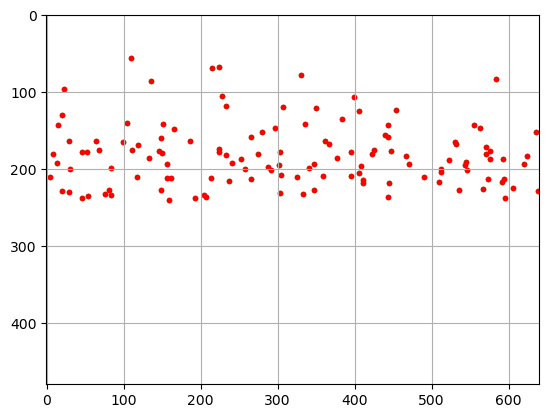

In [10]:
index = 0

measurements = data.get_measurement_points(index)
matches = vo.data_association(measurements, vo.get_map())
image_points = matches['points_1']
world_points = matches['points_2']
appearances = matches['appearances']

robot_pose = vo.get_trajectory()['poses'][index]

projected_points = []
for i in range(len(world_points)):
    world_point = world_points[i]
    robot_point = np.dot(robot_pose, np.append(world_point, 1))[:3]
    projected_point = camera.project(robot_point)
    projected_points.append(projected_point)

print('Image points:', image_points)
print('Projected points:', projected_points)

fig, ax = plt.subplots()
ax.imshow(np.ones((480, 640, 3)))
ax.scatter([point[0] for point in image_points], [point[1] for point in image_points], color='green', marker='.')
ax.scatter([point[0] for point in projected_points], [point[1] for point in projected_points], color='red', marker='.')
plt.grid()
plt.show()